In [ ]:

import matplotlib.pyplot as plt
from random import seed
import seaborn as sns
import numpy as np
import scipy as sp

from util import time_algorithm
from bt import batalla_naval as batalla_naval_bt
from pl import batalla_naval as batalla_naval_pl
from aprox import batalla_naval as batalla_naval_aprox
from greedy import batalla_naval as batalla_naval_greedy

In [3]:
seed(12345)
np.random.seed(12345)
sns.set_theme()

In [ ]:
def generar_tablero_aleatorio(nm, k):
    filas = [np.random.randint(0, nm) for _ in range(nm)]
    columnas = [np.random.randint(0, nm) for _ in range(nm)]
    b = [np.random.randint(1, nm) for _ in range(k)]
    return filas, columnas, b

def generar_resultados(algoritmo, nm, k):
    nm = np.linspace(2, nm, 50)
    k = np.linspace(1, k, 50)
    return nm, k, time_algorithm(algoritmo, nm, k, lambda a1, a2: [*generar_tablero_aleatorio(a1, a2)])

## Ajustes

In [5]:
def ajuste_exponencial(x, resultados):
    f = lambda x, c1, c2: c1 * (c2 ** x[1]) * (x[0])
    x = (x[:, 0], x[:, 1])
    c, _ = sp.optimize.curve_fit(f, x, resultados)
    r = np.sum((f(x, *c) - resultados) ** 2)
    return c, r

def ajuste_aprox(x, resultados):
    f = lambda x, c1, c2: c1 * x[0] + c2 * x[1] * np.log(x[1])
    x = (x[:, 0], x[:, 1])
    c, _ = sp.optimize.curve_fit(f, x, resultados)
    r = np.sum((f(x, *c) - resultados) ** 2)
    return c, r

# Backtracking

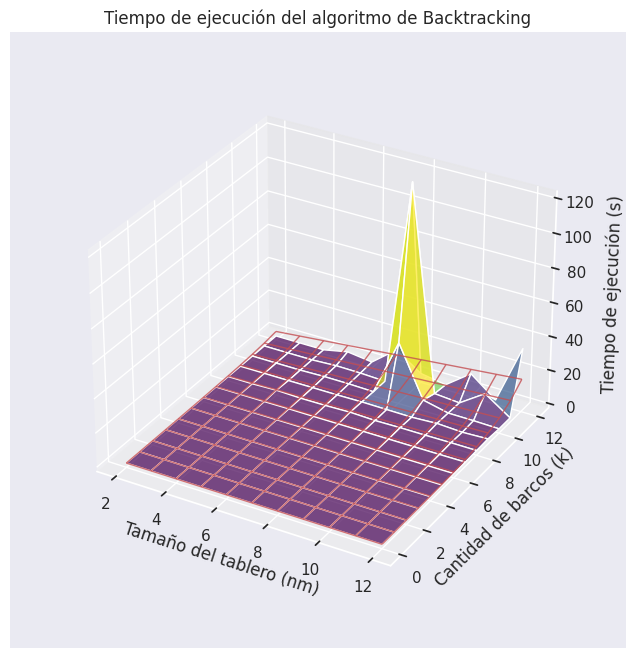

La recta que mejor ajusta es: 0.005204772238398785 * 1.594855859611703^k * n * m
El error cuadratico total es: 15464.564254208772


In [7]:
nm, k, resultados = generar_resultados(batalla_naval_bt, 12, 12)
resultados_arr = np.array([resultados[(i, j)] for i in nm for j in k])
data = np.array([[i, j] for i in nm for j in k])

c, r = ajuste_exponencial(data, resultados_arr)

nm_grid, k_grid = np.meshgrid(nm, k)
z_grid = np.array([resultados[(int(i), int(j))] for i, j in zip(nm_grid.flatten(), k_grid.flatten())]).reshape(nm_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(nm_grid, k_grid, z_grid, cmap='viridis', alpha=0.7, label="Medición")

ax.set_title("Tiempo de ejecución del algoritmo de Backtracking")
ax.set_xlabel("Tamaño del tablero (nm)")
ax.set_ylabel("Cantidad de barcos (k)")
ax.set_zlabel("Tiempo de ejecución (s)", labelpad=10)

# Ajuste
z_fit = lambda nm, k, c: c[0] * (c[1] ** k) * nm
ax.plot_wireframe(nm_grid, k_grid, z_fit(nm_grid, k_grid, c), color="r", linewidth=1, alpha=0.8, label="Ajuste")

ax.set_box_aspect(None, zoom=0.85)
plt.show()
print(f"La recta que mejor ajusta es: {c[0]} * {c[1]}^k * n * m")
print(f"El error cuadratico total es: {r}")

# Programación Entera

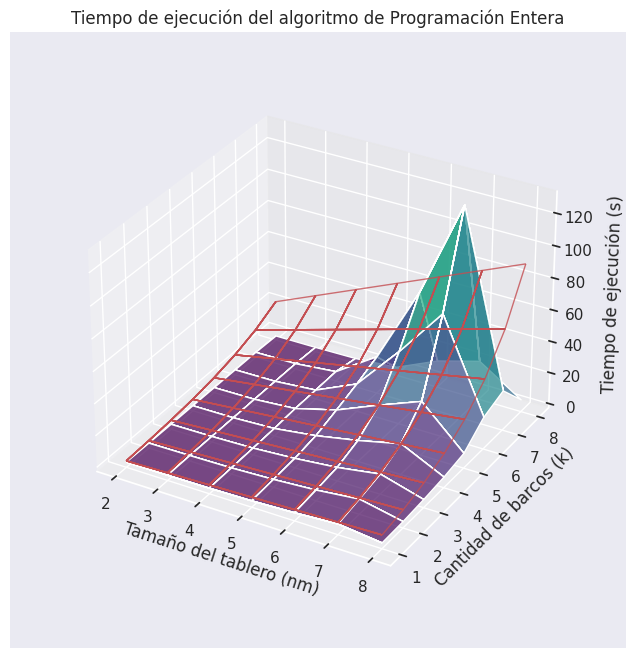

La recta que mejor ajusta es: 0.5053701568974144 * 1.4761481047956055^k * n * m
El error cuadratico total es: 766215.1902389377


In [ ]:
nm, k, resultados = generar_resultados(batalla_naval_pl, 8, 8)
resultados_arr = np.array([resultados[(i, j)] for i in nm for j in k])
data = np.array([[i, j] for i in nm for j in k])

c, r = ajuste_exponencial(data, resultados_arr)

nm_grid, k_grid = np.meshgrid(nm, k)
z_grid = np.array([resultados[(int(i), int(j))] for i, j in zip(nm_grid.flatten(), k_grid.flatten())]).reshape(nm_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(nm_grid, k_grid, z_grid, cmap='viridis', alpha=0.7, label="Medición")

ax.set_title("Tiempo de ejecución del algoritmo de Programación Entera")
ax.set_xlabel("Tamaño del tablero (nm)")
ax.set_ylabel("Cantidad de barcos (k)")
ax.set_zlabel("Tiempo de ejecución (s)", labelpad=10)

# Ajuste
z_fit = lambda nm, k, c: c[0] * (c[1] ** k) * nm
ax.plot_wireframe(nm_grid, k_grid, z_fit(nm_grid, k_grid, c), color="r", linewidth=1, alpha=0.8, label="Ajuste")

ax.set_box_aspect(None, zoom=0.85)
plt.show()
print(f"La recta que mejor ajusta es: {c[0]} * {c[1]}^k * n * m")
print(f"El error cuadratico total es: {r}")

# Aproximación

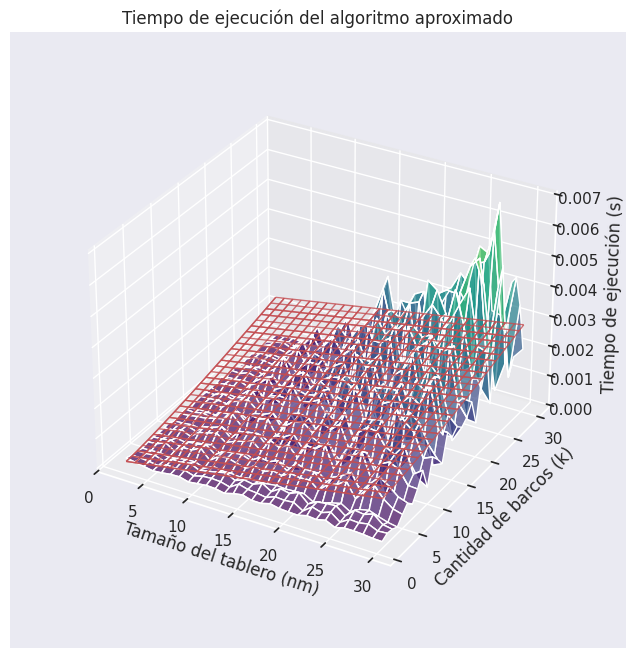

La recta que mejor ajusta es: 5.176142509505147e-05 * n * m + 1.272321589763336e-05 * klogk
El error cuadratico total es: 0.0017177766995156996


In [9]:
nm, k, resultados = generar_resultados(batalla_naval_aprox, 30, 30)
resultados_arr = np.array([resultados[(i, j)] for i in nm for j in k])
data = np.array([[i, j] for i in nm for j in k])

c, r = ajuste_aprox(data, resultados_arr)

nm_grid, k_grid = np.meshgrid(nm, k)
z_grid = np.array([resultados[(int(i), int(j))] for i, j in zip(nm_grid.flatten(), k_grid.flatten())]).reshape(nm_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(nm_grid, k_grid, z_grid, cmap='viridis', alpha=0.7, label="Medición")

ax.set_title("Tiempo de ejecución del algoritmo aproximado")
ax.set_xlabel("Tamaño del tablero (nm)")
ax.set_ylabel("Cantidad de barcos (k)")
ax.set_zlabel("Tiempo de ejecución (s)", labelpad=10)

# Ajuste
z_fit = lambda nm, k, c: c[0] * nm + c[1] * k * np.log(k)
ax.plot_wireframe(nm_grid, k_grid, z_fit(nm_grid, k_grid, c), color="r", linewidth=1, alpha=0.8, label="Ajuste")

ax.set_box_aspect(None, zoom=0.85)
plt.show()
print(f"La recta que mejor ajusta es: {c[0]} * n * m * k + {c[1]} * klogk")
print(f"El error cuadratico total es: {r}")

# Greedy

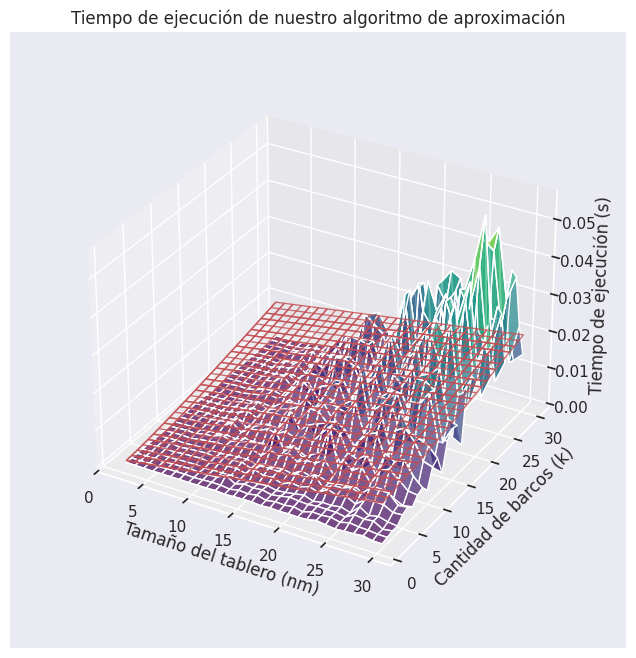

La recta que mejor ajusta es: 0.0003705778372097162 * n * m + 8.766246419853995e-05 * klogk
El error cuadratico total es: 0.1380102492354762


In [ ]:
nm, k, resultados = generar_resultados(batalla_naval_greedy, 30, 30)
resultados_arr = np.array([resultados[(i, j)] for i in nm for j in k])
data = np.array([[i, j] for i in nm for j in k])

c, r = ajuste_aprox(data, resultados_arr)

nm_grid, k_grid = np.meshgrid(nm, k)
z_grid = np.array([resultados[(int(i), int(j))] for i, j in zip(nm_grid.flatten(), k_grid.flatten())]).reshape(nm_grid.shape)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(nm_grid, k_grid, z_grid, cmap='viridis', alpha=0.7, label="Medición")

ax.set_title("Tiempo de ejecución de nuestro algoritmo de aproximación")
ax.set_xlabel("Tamaño del tablero (nm)")
ax.set_ylabel("Cantidad de barcos (k)")
ax.set_zlabel("Tiempo de ejecución (s)")

# Ajuste
z_fit = lambda nm, k, c: c[0] * nm + c[1] * k * np.log(k)
ax.plot_wireframe(nm_grid, k_grid, z_fit(nm_grid, k_grid, c), color="r", linewidth=1, alpha=0.8, label="Ajuste")

ax.set_box_aspect(None, zoom=0.85)
plt.show()
print(f"La recta que mejor ajusta es: {c[0]} * n * m * k + {c[1]} * klogk")
print(f"El error cuadratico total es: {r}")

# Calculo de cota de aproximación

In [3]:
from concurrent.futures import ProcessPoolExecutor, as_completed
from aprox import batalla_naval as batalla_naval_aprox
from random import randint
import os

MAX_WORKERS = (os.cpu_count() or 4)

def _cmp_with_optimum(algorithm, nm, k):
    filas, columnas, b, z = generador_juegos(nm, nm, k)
    _, A = algorithm(filas, columnas, b)
    return z / A


def calc_aproximation(algorithm, nm, k):
    futures = {}
    r = 0

    with ProcessPoolExecutor(MAX_WORKERS) as p:
        for i in nm:
            for j in k:
                fut = p.submit(_cmp_with_optimum, algorithm, i, j)
                futures[fut] = (i, j)

        for f in as_completed(futures):
            r = max(r, f.result())

    return r

# La siguiente función toma los siguientes parámetros y devuelve un tablero con barcos ubicados de forma
# válida para formar un tablero óptimo dado que luego de ubicarlos, recorre el mismo para establecer
# las demandas en función de los barcos ubicados.

# n = cantidad de filas
# m = cantidad de columnas
# k = cantidad de barcos


def generador_juegos(n, m, k):
    tablero = [[0 for _ in range(m)] for _ in range(n)]

    def en_rango(i, j):
        return 0 <= i and 0 <= j and i < n and j < m

    def insertar_barco_horizontal(i, j, l):
        """
        La complejidad es O(l)
        """
        if j + l > m:
            return False

        # O(l)
        for Ci in range(i - 1, i + 2):
            for Cj in range(j - 1, j + l + 1):
                if en_rango(Ci, Cj) and tablero[Ci][Cj] == 1:
                    return False

        # O(l)
        for k in range(l):
            tablero[i][j + k] = 1

        return True

    def insertar_barco_vertical(i, j, l):
        """
        La complejidad es O(l)
        """
        if i + l > n:
            return False

        # O(l)
        for Ci in range(i - 1, i + l + 1):
            for Cj in range(j - 1, j + 2):
                if en_rango(Ci, Cj) and tablero[Ci][Cj] == 1:
                    return False

        # O(l)
        for k in range(l):
            tablero[i + k][j] = 1

        return True

    def insertar_barco(l, intentos=0):
        """
        La complejidad es O(n * m * l)
        """
        if intentos == 5:
            return False

        i = randint(0, n - l)
        j = randint(0, m - l)

        if insertar_barco_horizontal(i, j, l):
            return True

        if insertar_barco_vertical(i, j, l):
            return True

        return insertar_barco(l, intentos + 1)

    # Insertamos barcos de largos aleatorios mientras guardamos estos largos en un arreglo
    barcos = []
    for _ in range(k):
        b_i = randint(1, max(n, m))
        if insertar_barco(b_i):
            barcos.append(b_i)

    # Calculamos las demandas por filas.
    demanda_optima = 0
    demandas_filas = []
    for i in range(n):
        valor = sum(tablero[i])
        demandas_filas.append(valor)
        demanda_optima += valor

    # Calculamos las demandas por columnas.
    demandas_columnas = []
    for j in range(m):
        valor = sum(tablero[i][j] for i in range(n))
        demandas_columnas.append(valor)
        demanda_optima += valor

    return demandas_filas, demandas_columnas, barcos, demanda_optima

nm = 150
k = 150

print(calc_aproximation(batalla_naval_aprox, range(1, nm), range(1, k)))

3.0
